In [11]:
import numpy as np

X = [-4.5, 3, 6.3, 7.8, 12.5]
P = [0.3, 0.4, 0.1, 0.1, 0.1]

r = 1
N = 10000

data = np.random.exponential(r, N)

# 2.1 Расчет выборочных числовых характеристик
min_value = np.min(data)
max_value = np.max(data)
sample_mean = np.mean(data)
sample_variance = np.var(data)
biased_sample_variance = np.var(data, ddof=1)
sample_std_dev = np.std(data, ddof=1)

# Вывод результатов
print("Минимальное значение выборки:", min_value)
print("Максимальное значение выборки:", max_value)
print("Выборочное среднее:", sample_mean)
print("Выборочная дисперсия (исправленная):", biased_sample_variance)
print("Выборочное среднеквадратическое отклонение:", sample_std_dev)

Минимальное значение выборки: 1.9132293878856504e-05
Максимальное значение выборки: 8.949870273433984
Выборочное среднее: 1.0142077145994677
Выборочная дисперсия (исправленная): 1.045749164714077
Выборочное среднеквадратическое отклонение: 1.0226187778024014


In [12]:
# 2.2 Расчет теоретического математического ожидания и дисперсии
theoretical_mean = 1 / r
theoretical_variance = 1 / (r ** 2)

# Вывод теоретических результатов
print("\nТеоретическое математическое ожидание:", theoretical_mean)
print("Теоретическая дисперсия:", theoretical_variance)

# Сравнение с выборочными результатами
print("\nСравнение с выборочными результатами:")
print("Разница между теоретическим и выборочным средним:", abs(theoretical_mean - sample_mean))
print("Разница между теоретической и выборочной дисперсией:", abs(theoretical_variance - biased_sample_variance))


Теоретическое математическое ожидание: 1.0
Теоретическая дисперсия: 1.0

Сравнение с выборочными результатами:
Разница между теоретическим и выборочным средним: 0.01420771459946768
Разница между теоретической и выборочной дисперсией: 0.045749164714077084


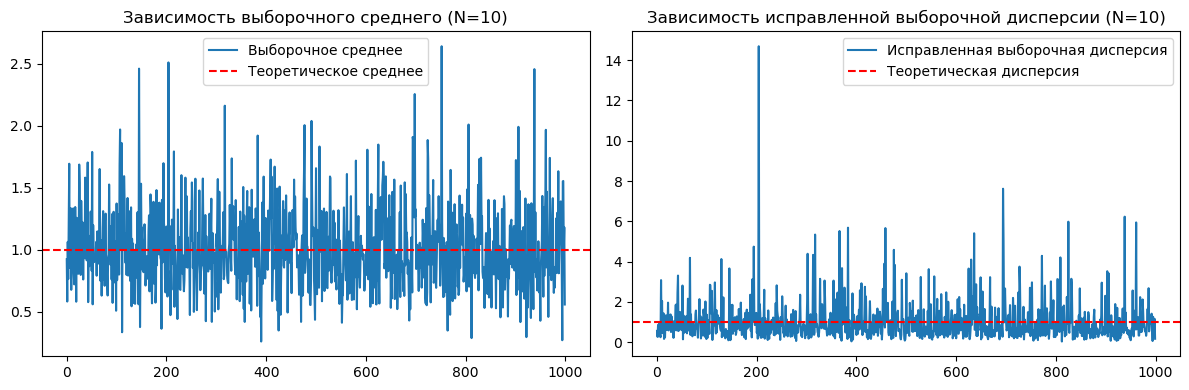

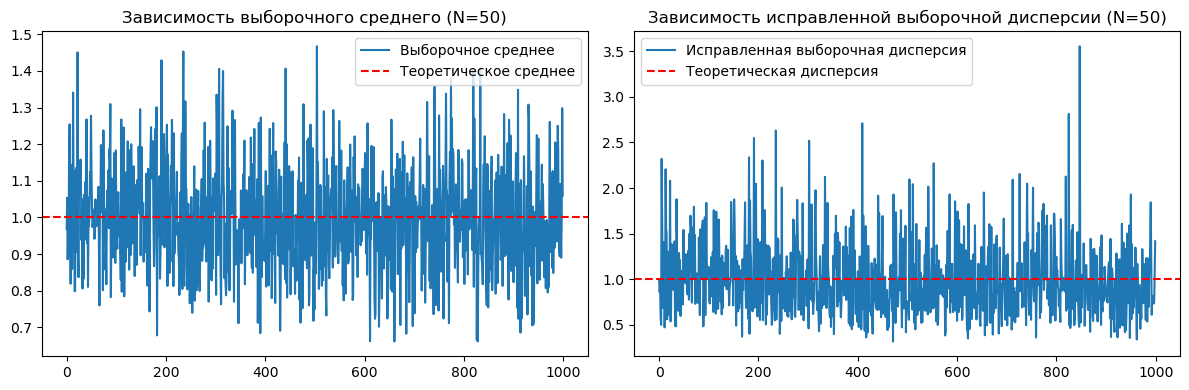

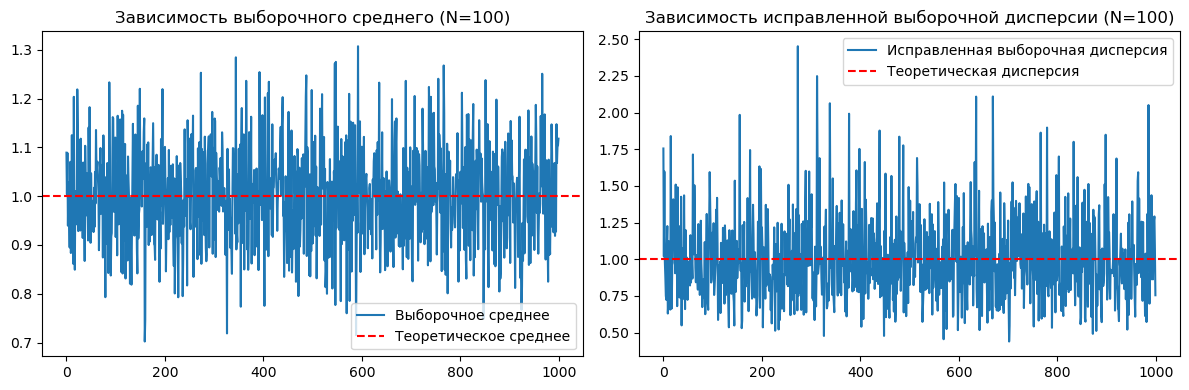

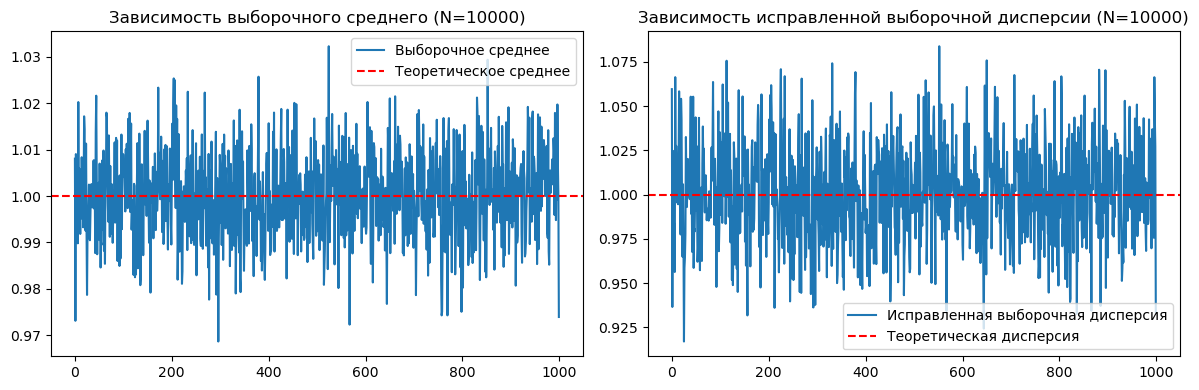

In [13]:
import matplotlib.pyplot as plt

# 2.3 Графический анализ
sample_sizes = [10, 50, 100, 10000]

for N in sample_sizes:
    means = []
    variances = []

    for _ in range(1000):
        sample_data = np.random.exponential(r, N)
        means.append(np.mean(sample_data))
        variances.append(np.var(sample_data, ddof=1))

    # График зависимости выборочного среднего от номера реализации
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(means, label='Выборочное среднее')
    plt.axhline(theoretical_mean, color='red', linestyle='dashed', label='Теоретическое среднее')
    plt.title(f'Зависимость выборочного среднего (N={N})')
    plt.legend()

    # График зависимости исправленной выборочной дисперсии от номера реализации
    plt.subplot(1, 2, 2)
    plt.plot(variances, label='Исправленная выборочная дисперсия')
    plt.axhline(theoretical_variance, color='red', linestyle='dashed', label='Теоретическая дисперсия')
    plt.title(f'Зависимость исправленной выборочной дисперсии (N={N})')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [14]:
# 2.4 Нахождение среднего от выборочного среднего и исправленной выборочной дисперсии
N_large = 10000
num_simulations = 1000

means_large = []
variances_large = []

for _ in range(num_simulations):
    sample_data_large = np.random.exponential(r, N_large)
    means_large.append(np.mean(sample_data_large))
    variances_large.append(np.var(sample_data_large, ddof=1))

# Сравнение с теоретическими значениями
print("\nСравнение с теоретическими значениями (N=10000):")
print("Среднее от выборочного среднего:", np.mean(means_large))
print("Среднее от исправленной выборочной дисперсии:", np.mean(variances_large))
print("Теоретическое математическое ожидание:", theoretical_mean)
print("Теоретическая дисперсия:", theoretical_variance)


Сравнение с теоретическими значениями (N=10000):
Среднее от выборочного среднего: 0.9994556263843576
Среднее от исправленной выборочной дисперсии: 0.9985496717447565
Теоретическое математическое ожидание: 1.0
Теоретическая дисперсия: 1.0


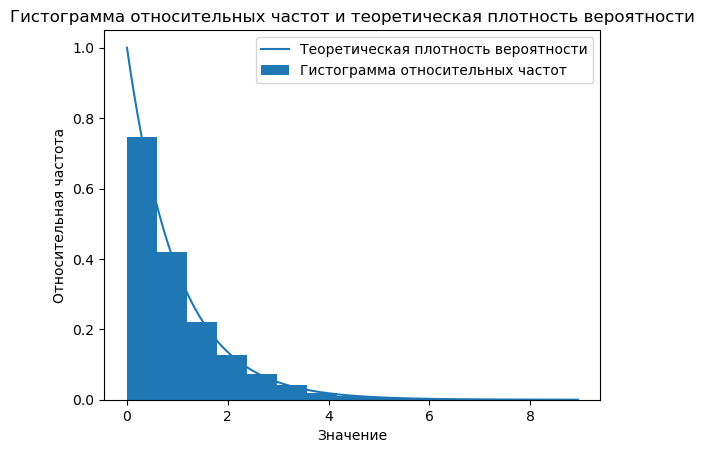

In [15]:
# Расчет гистограммы относительных частот
# а) Находим минимальное и максимальное значение в выборке
xmin, xmax = np.min(data), np.max(data)

# б) Рассчитываем количество интервалов группировки по формуле Стерджеса
r_sturges = int(np.ceil(1 + np.log2(N)))

# в) Находим ширину каждого интервала группировки
h = (xmax - xmin) / r_sturges

# г) Получаем массив границ интервалов группировки
bins_edges = np.linspace(xmin, xmax, r_sturges + 1)

# д) Считаем количество значений, попавших в каждый интервал
hist, _ = np.histogram(data, bins=bins_edges)

# Построение гистограммы относительных частот
# Нормализация гистограммы
n = len(data)
hist_relative = hist / (h * n)

# Построение гистограммы
plt.bar(bins_edges[:-1], hist_relative, width=h, align='edge', label='Гистограмма относительных частот')

# Генерация плотности вероятности теоретического распределения (в данном случае, экспоненциального)
x_theoretical = np.linspace(xmin, xmax, 1000)
pdf_theoretical = r * np.exp(-r * x_theoretical)
plt.plot(x_theoretical, pdf_theoretical, label='Теоретическая плотность вероятности')

# Настройка графика
plt.title('Гистограмма относительных частот и теоретическая плотность вероятности')
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.legend()
plt.show()

In [16]:
# Расчет выборочного среднего и выборочной дисперсии по группированным данным
# Вычисление выборочного среднего
X_bar_grouped = np.sum(0.5 * (bins_edges[:-1] + bins_edges[1:]) * hist) / n

# Вычисление выборочной дисперсии
S2_grouped = (np.sum(0.5 * (bins_edges[:-1] + bins_edges[1:])**2 * hist) / n) - X_bar_grouped**2

# Вывод результатов
print("Выборочное среднее по группированным данным:", X_bar_grouped)
print("Выборочная дисперсия по группированным данным:", S2_grouped)

Выборочное среднее по группированным данным: 1.0426171245624267
Выборочная дисперсия по группированным данным: 3.1151022890246907


In [19]:
'''
Выборочное среднее:

По группированным данным: 1.0426
Из задания 2.1: 1.0142
Различие в значениях может быть обусловлено использованием группированных данных в первом случае. Если различие небольшое, то метод оценки по группированным данным может быть считаться приемлемым.

Выборочная дисперсия:

По группированным данным: 3.1151
Из задания 2.1: 1.0457 (исправленная дисперсия)
Здесь видно значительное различие в значениях. Вероятно, это связано с тем, что группировка данных может вносить неточности в оценку дисперсии. Стоит внимательно изучить, как была проведена группировка и как это влияет на результаты.

Обратите внимание, что различия в результатах также могут быть обусловлены стохастической природой генерации случайных данных, и небольшие отклонения вполне нормальны. Важно также учитывать объем выборки и особенности генерации данных при интерпретации результатов.
'''

'\nВыборочное среднее:\n\nПо группированным данным: 1.0426\nИз задания 2.1: 1.0142\nРазличие в значениях может быть обусловлено использованием группированных данных в первом случае. Если различие небольшое, то метод оценки по группированным данным может быть считаться приемлемым.\n\nВыборочная дисперсия:\n\nПо группированным данным: 3.1151\nИз задания 2.1: 1.0457 (исправленная дисперсия)\nЗдесь видно значительное различие в значениях. Вероятно, это связано с тем, что группировка данных может вносить неточности в оценку дисперсии. Стоит внимательно изучить, как была проведена группировка и как это влияет на результаты.\n\nОбратите внимание, что различия в результатах также могут быть обусловлены стохастической природой генерации случайных данных, и небольшие отклонения вполне нормальны. Важно также учитывать объем выборки и особенности генерации данных при интерпретации результатов.\n'

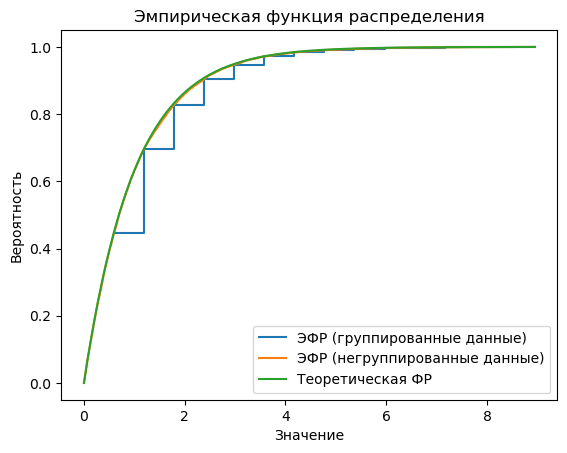

In [20]:
cdf_grouped = np.cumsum(hist) / np.sum(hist)

# Расчет эмпирической функции распределения для негруппированных данных
data_sorted = np.sort(data)
cdf_ungrouped = np.arange(1, N + 1) / N

# График
plt.step(bins_edges[1:], cdf_grouped, label='ЭФР (группированные данные)', where='post')
plt.step(data_sorted, cdf_ungrouped, label='ЭФР (негруппированные данные)', where='post')

# Теоретическая функция распределения
x_theoretical = np.linspace(np.min(data), np.max(data), 1000)
cdf_theoretical = 1 - np.exp(-r * x_theoretical)

# График теоретической функции распределения
plt.plot(x_theoretical, cdf_theoretical, label='Теоретическая ФР')

# Настройка графика
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()
plt.show()